In [1]:
from __future__ import print_function
import astropy
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
sys.path.append("../src/")

# Import our package

In [2]:
import hpfspec

In [4]:
# Lets read in an HPF spectrum
# The function reads in the object name from the header
# If ccf_redshift is true, then it will redshift the wavelength to the stellar frame
# i.e., this takes out the absolute redshift estimated by calculating a CCF
H = hpfspec.HPFSpectrum("../data/hpf/spectra/GJ_273/Slope-20180302T021512_R01.optimal.fits",ccf_redshift=True)

Defaulting to fixed wavelength
Reading from file ../data/target_files/GJ_273.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 16.66667km/s
Second iteration: RVabs = 16.51038km/s, sigma=2.84991
RVabs it #1: 16.66667+- 0.00000km/s
RVabs it #2: 16.51038+- 0.00000km/s
berv=-21.1412280604,rv=16.5103820428


In [5]:
print(H) # The SNR is for order 18

HPFSpec(GJ_273,sn18=525.7)


### This creates a Target instance within our object

- The config file for the object is by default saved to "../data/target_files/"
- If that file already exist, then it is read. If it does not exist, it queries Simbad
- This way you can change the values within the file if it is already created

In [6]:
# This is used 
H.target

GJ_273, ra=111.8521, dec=5.2258, pmra=572.51, pmdec=-3693.51, rv=18.2200, px=262.9800, epoch=2451545.0

In [7]:
H.target.ra, H.target.dec

(111.85208208333333, 5.225786944444445)

In [8]:
# We can use this to calculate the barycentric velocity in km/s
t = astropy.time.Time("2019-10-08 00:00:00.0",format="iso").jd
H.target.calc_barycentric_velocity(t,obsname='McDonald Observatory')

(2458764.5000194246, 28.16437971478253)

In [9]:
# The barycentric velocity is automatically stored in an attribute
H.berv # km/s

-21.141228060446405

## We can plot the spectrum 

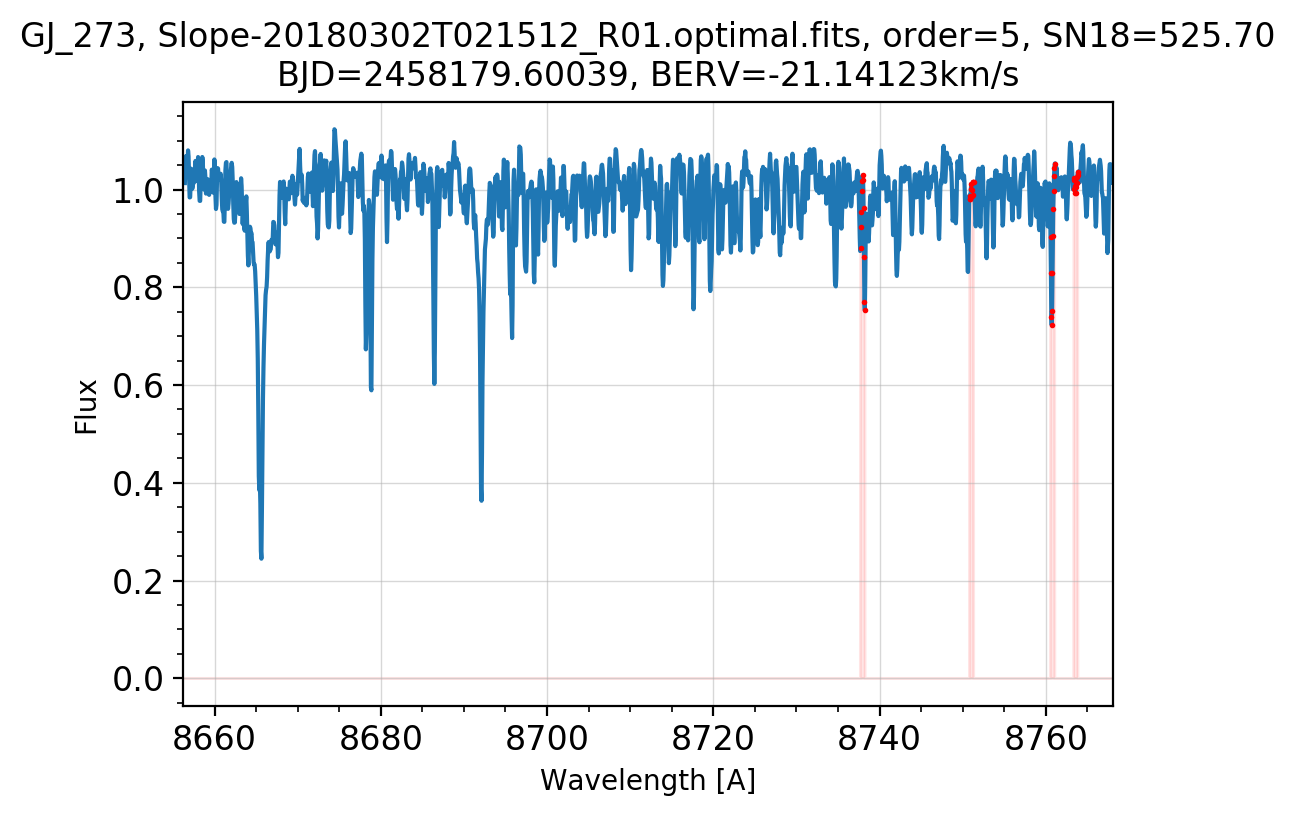

In [10]:
H.plot_order(5,deblazed=True)

Text(0.5,1,'Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)')

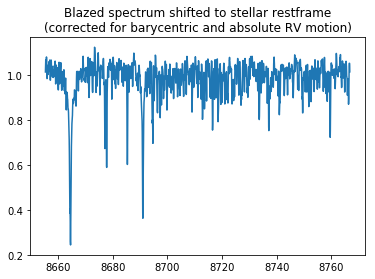

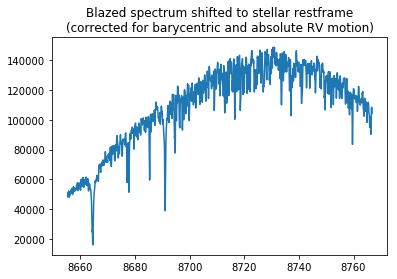

In [11]:
#We could also this this the following way using the handy wavelength and flux attributes
o = 5

# Deblazed
fig, ax = plt.subplots()
ax.plot(H.w_shifted[o],H.f_debl[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

# Blazed
fig, ax = plt.subplots()
ax.plot(H.w_shifted[o],H.f[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

In [12]:
# Other attributes are:
print(H.w_shifted.shape) # shifted wavelength
print(H.w.shape)         # non-shifted original wavelength
print(H.f.shape)         # non-deblazed science flux (sky-subtracted)
print(H.f_debl.shape)    # deblazed science flux (sky-subtracted)
print(H.f_sci.shape)     # Science flux (not sky-subtracted)
print(H.e.shape)         # error for deblazed sky-subtracted science flux
print(H.object)          # Object
print(H.bjd)             # BJD_TDB midpoint
print(H.sn18)            # SNR for order 18
print(H.berv)            # barycentric correction in km/s

(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
(28, 2048)
GJ_273
2458179.60039
525.6979
-21.141228060446405


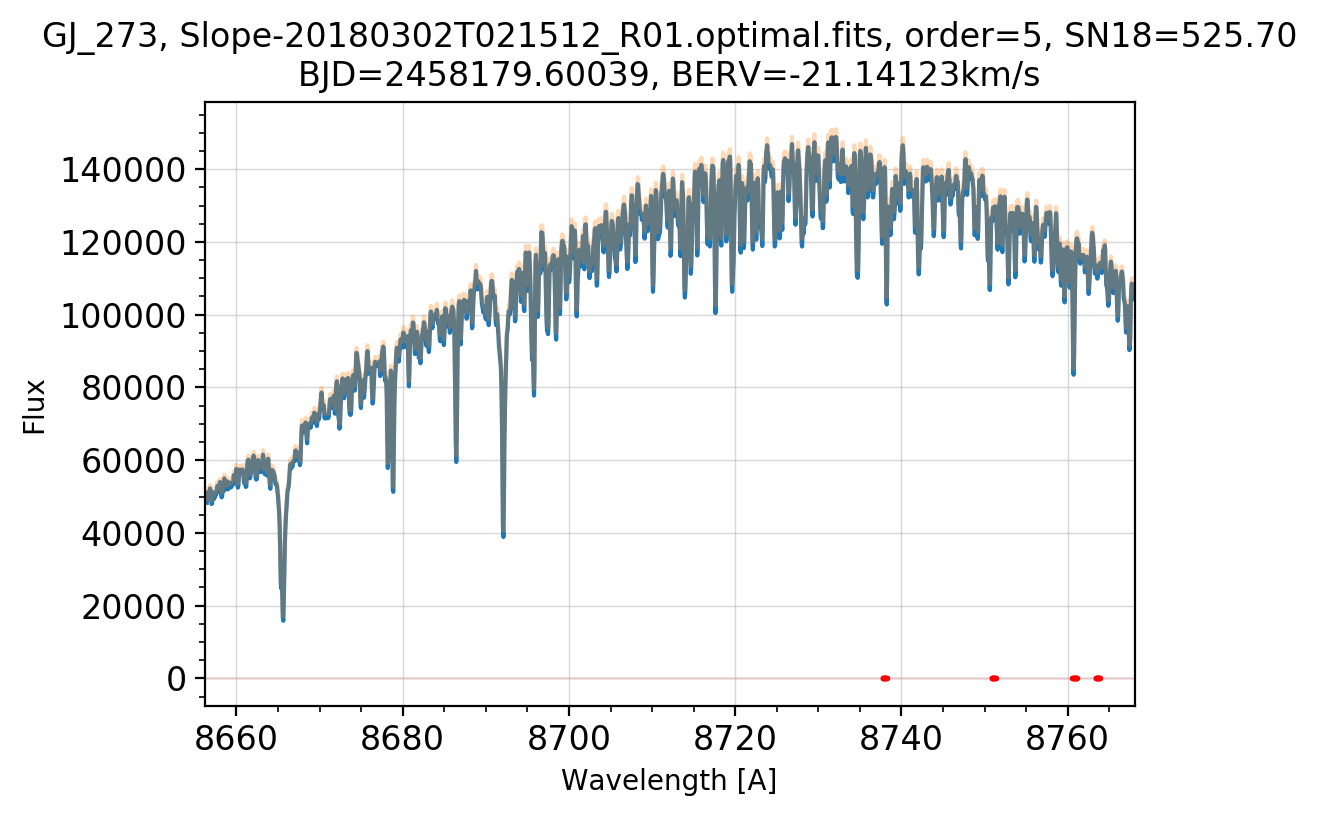

In [13]:
H.plot_order(5,deblazed=False)

# CCFs

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


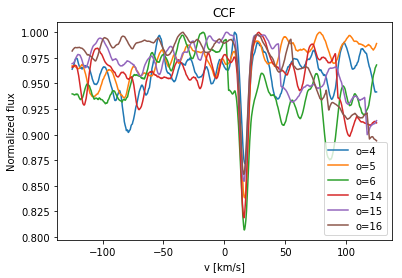

In [23]:
# Lets calculate blazingly fast ccfs for well-behaved orders
v = np.linspace(-125.,125.,1501)
orders = [4,5,6,14,15,16]
ccf = H.calculate_ccf_for_orders(v,orders=orders,plot=True)

In [24]:
# The last row in the CCF is a sum of all of the orders
ccf.shape

(29, 1501)

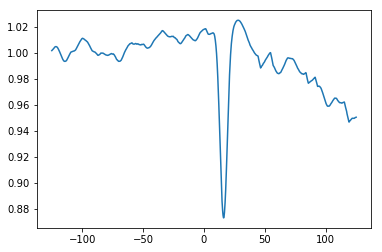

In [25]:
fig, ax = plt.subplots()
ax.plot(v,ccf[28]/np.median(ccf[28]))

# Calculate absolute RVs for orders

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 16.83333km/s
Second iteration: RVabs = 17.00619km/s, sigma=2.79327
First iteration:  RVabs = 16.66667km/s
Second iteration: RVabs = 16.51038km/s, sigma=2.84991
First iteration:  RVabs = 16.50000km/s
Second iteration: RVabs = 16.60956km/s, sigma=3.02761
First iteration:  RVabs = 16.00000km/s
Second iteration: RVabs = 16.05138km/s, sigma=2.89205
First iteration:  RVabs = 16.16667km/s
Second iteration: RVabs = 15.99227km/s, sigma=2.94905
First iteration:  RVabs = 16.00000km/s
Second iteration: RVabs = 15.94384km/s, sigma=2.98947
RVabs it #1: 16.36111+- 0.32513km/s
RVabs it #2: 16.35227+- 0.38854km/s


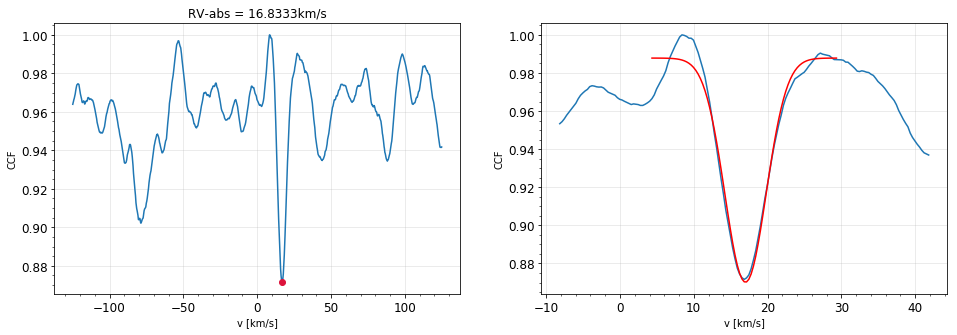

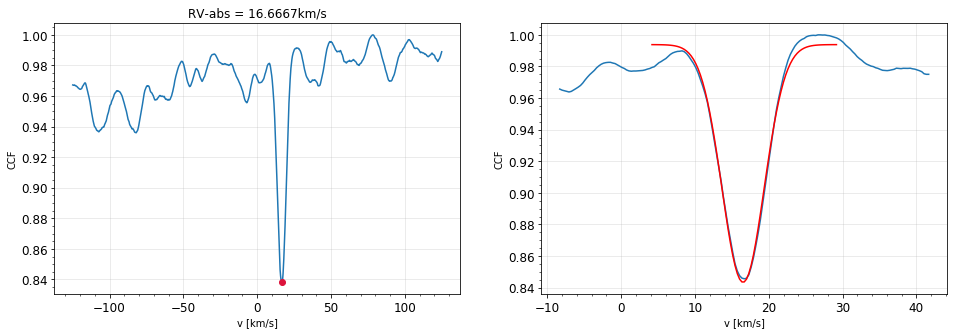

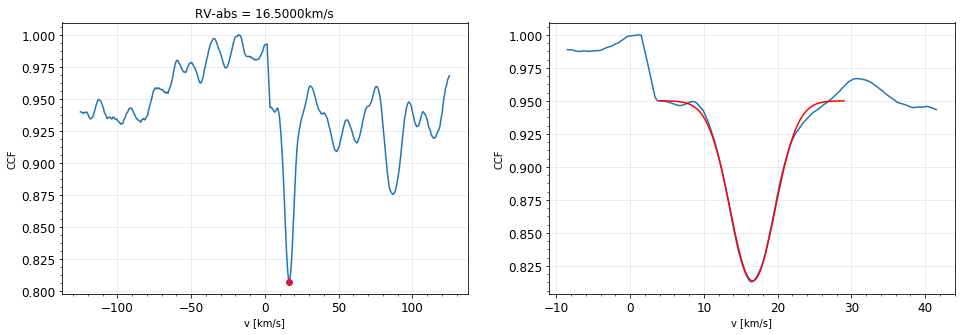

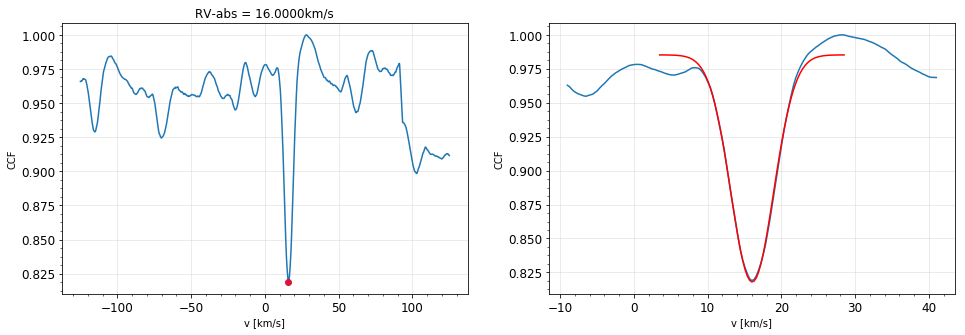

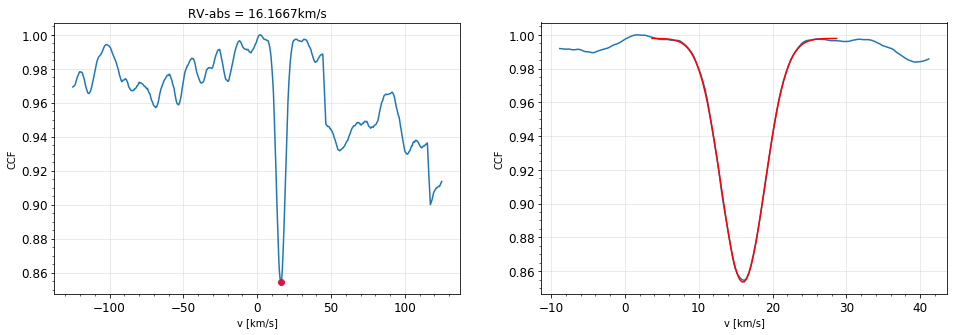

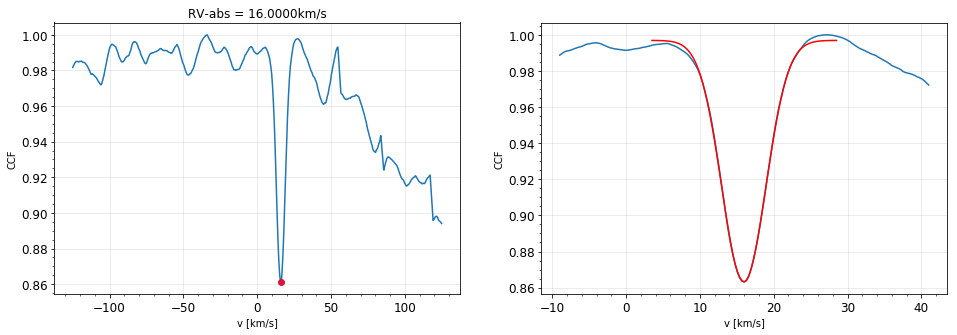

In [26]:
# Calculates on barycentric shifted (not abs RV shifted) and undeblazed version
# rv1 is just the argmin of the CCF, the rv2 is an actual Gaussian fit minimum to the CCF valley
# You can see that order 18 is pretty wonky -- likely tellurics
rv1, rv2 = H.rvabs_for_orders(v,orders,plot=True,verbose=True)

# Working with a collection of spectra

In [28]:
import glob

In [40]:
files = glob.glob("../data/hpf/spectra/*/*.fits")
HS = hpfspec.HPFSpecList(filelist=files)

Defaulting to fixed wavelength
Reading from file ../data/target_files/GJ_273.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 16.66667km/s
Second iteration: RVabs = 16.51038km/s, sigma=2.84991
RVabs it #1: 16.66667+- 0.00000km/s
RVabs it #2: 16.51038+- 0.00000km/s
berv=-21.1412280604,rv=16.5103820428
Reading from file ../data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.66667km/s
Second iteration: RVabs = -110.58583km/s, sigma=2.97052
RVabs it #1: -110.66667+- 0.00000km/s
RVabs it #2: -110.58583+- 0.00000km/s
berv=26.3924979379,rv=-110.585827708
Reading from file ../data/target_files/GJ_699.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -110.50000km/s
Second iteration: RVabs = -110.56918km/s, sigma=3.00271
RVabs it #1: -110.50000+- 0.00000km/s
RVabs it #2: -110.56918+- 0.00000km/s
berv=-25.989

In [41]:
HS.df

,OBJECT_ID,filename,exptime,sn18,qprog,rv
0,GJ_273,../data/hpf/spectra/GJ_273/Slope-20180302T0215...,319.50,525.697876,NaN,16.510382
1,GJ_699,../data/hpf/spectra/GJ_699/Slope-20190319T1148...,191.70,516.742920,ENG19-1-003,-110.585828
2,GJ_699,../data/hpf/spectra/GJ_699/Slope-20181003T0139...,330.15,757.786011,ENG18-3-003,-110.569179
3,GJ_699,../data/hpf/spectra/GJ_699/Slope-20181003T0145...,330.15,764.023743,ENG18-3-003,-110.592499
4,VB_10,../data/hpf/spectra/VB_10/Slope-20190612T06580...,969.15,113.248840,HET19-2-300,35.265323


In [42]:
HS.sn18

[525.6979, 516.7429, 757.786, 764.02374, 113.24884]

In [43]:
HS.objects

['GJ_273', 'GJ_699', 'GJ_699', 'GJ_699', 'VB_10']